## Analis de Dataset de la satisfacion de los pasajeros de una aerolinea

# 1.Introducion

> ## Con el dataset obtenido de kaggle podemos predecir que tan satisfecho estara un cliente que aborda en un avion 

### A continuacion se detallan las columnas que estan en nuestro dataset

#### inc
#### id 
#### Gender 
#### Customer Type
#### Age
#### Type of Travel 
#### Class
#### Flight Distance
#### Inflight wifi service
#### Departure/Arrival time convenient
#### Ease of Online booking 
#### Gate location
#### Food and drink 
#### Online boarding
#### Seat comfort 
#### Inflight entertainment 
#### On-board service 
#### Leg room service 
#### Baggage handling 
#### Checkin service
#### Inflight service 
#### Cleanliness
#### Departure Delay in Minutes 
#### Arrival Delay in Minutes 
#### satisfaction

 
### a partir de estos datos realizaremos un modelo el cual pueda predecir la staifacion que el cliente tendra

# Comenzamos por la lectura de datos para lo cual importamos las librerias:
#### - pandas: Caragar los datos
#### - Display: Mostrar en tablas

In [1]:
import pandas as pd
from IPython.display import display 

### cargamos le data set en formato csv con pandas

In [2]:
data = pd.read_csv("dataset/train.csv")
print(data)

           inc      id  Gender      Customer Type  Age   Type of Travel  \
0            0   70172    Male     Loyal Customer   13  Personal Travel   
1            1    5047    Male  disloyal Customer   25  Business travel   
2            2  110028  Female     Loyal Customer   26  Business travel   
3            3   24026  Female     Loyal Customer   25  Business travel   
4            4  119299    Male     Loyal Customer   61  Business travel   
...        ...     ...     ...                ...  ...              ...   
103899  103899   94171  Female  disloyal Customer   23  Business travel   
103900  103900   73097    Male     Loyal Customer   49  Business travel   
103901  103901   68825    Male  disloyal Customer   30  Business travel   
103902  103902   54173  Female  disloyal Customer   22  Business travel   
103903  103903   62567    Male     Loyal Customer   27  Business travel   

           Class  Flight Distance  Inflight wifi service  \
0       Eco Plus              460      

In [3]:
display(data) 

,inc,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


## Primero comenzamos con el preprodesamiento de los datos

In [4]:
#obtenemos la informacion de los datos
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   inc                                103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [5]:
#Cuantificamos cuntos datos faltantes tenermos
print(data.isnull().sum())

inc                                    0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

In [6]:
#Mostramos los datos que son nulos
print(data.isnull())

          inc     id  Gender  Customer Type    Age  Type of Travel  Class  \
0       False  False   False          False  False           False  False   
1       False  False   False          False  False           False  False   
2       False  False   False          False  False           False  False   
3       False  False   False          False  False           False  False   
4       False  False   False          False  False           False  False   
...       ...    ...     ...            ...    ...             ...    ...   
103899  False  False   False          False  False           False  False   
103900  False  False   False          False  False           False  False   
103901  False  False   False          False  False           False  False   
103902  False  False   False          False  False           False  False   
103903  False  False   False          False  False           False  False   

        Flight Distance  Inflight wifi service  \
0                 False  

## en vista de que la columna Arrival Delay in Minutes es la unica columna la cual tiene datos faltantes y solo son 310 se tiene las siguientes opciones que podemos realizar para el preprocesamiento de datos:
> # Eliminar las fialas en las que estan los datos perididos:
>  ### Esta opcion es viable dado de son 310 datos perdidos de 103905 datos viniendo solo a representar un 310/103905 0.00298 del total de datos, dada la poca insidencia de los datos perdidos nos podemos permitir no utilizar estos datos


> # Rellenarlo con la media 
>  ### La segunda opcion que se perfila es la de rellenar con la media dado que los datos estan en minutos es posible realizar esta tecnica para el preprocesado de los datos.
    
 ## Elecion: 
 > # Se optara por la segunda elecion rellenar los datos peridios con la media

In [7]:
#Obtenomso la meidia de la columna Arrival Delay in Minutes
media=data["Arrival Delay in Minutes"].mean()
#Mostramos la media 
print("La media de la columna es Arrival Delay in Minutes es:",media)
#Rellenamos los datos
data["Arrival Delay in Minutes"].fillna(media,axis=0,inplace=True)

La media de la columna es Arrival Delay in Minutes es: 15.178678301832152


In [8]:
#Mostramos otra vez el numero de datos fatlantes para verificar que no tengamos datos faltantes
print(data.isnull().sum()) 

inc                                  0
id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64


#### Dado que ya no tenemos mas datos faltantes continumos con el preprocesamiento

In [9]:
display(data)

,inc,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


## De la tabla anterior podemos observar que las primeras dos columnas no aportan mucha informacion relevante para entrenar el modelo

> # inc:
>   ### Numero escalar creciente, se lo debe de eliminar, pues puede afectar al modelo debido a que los utlimos datos vendrian a tener un indice mas alto lo cual puede afectar al modelo

> # id:
>   ### dado que el id es numero escalar que tine como obejtivo identificar a los datos no tiene alguna corelacion con que el pasajero este satisfecho con su viaje 

## por lo cual eliminaremos esas columnas

In [10]:
#Eliminamos las primeras 2 columnas por lo explicado anteriormente
data.drop(["inc"],axis=1,inplace=True)
data.drop(["id"],axis=1,inplace=True)

print(data)

        Gender      Customer Type  Age   Type of Travel     Class  \
0         Male     Loyal Customer   13  Personal Travel  Eco Plus   
1         Male  disloyal Customer   25  Business travel  Business   
2       Female     Loyal Customer   26  Business travel  Business   
3       Female     Loyal Customer   25  Business travel  Business   
4         Male     Loyal Customer   61  Business travel  Business   
...        ...                ...  ...              ...       ...   
103899  Female  disloyal Customer   23  Business travel       Eco   
103900    Male     Loyal Customer   49  Business travel  Business   
103901    Male  disloyal Customer   30  Business travel  Business   
103902  Female  disloyal Customer   22  Business travel       Eco   
103903    Male     Loyal Customer   27  Business travel  Business   

        Flight Distance  Inflight wifi service  \
0                   460                      3   
1                   235                      3   
2                  11

In [11]:
display(data)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,3,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,3,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,5,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


### Como no podemos utilizar los datos que no sean escalares dentro del modelo lo llevaremos esto a datos escalares para lo cual indexaremos estos datos un indice que los representara de aqui para adelante

### para lo cual utilizaremos la libreria de sklearn 

In [12]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

data['Gender'] = labelencoder.fit_transform(data['Gender'])
data['Customer Type'] = labelencoder.fit_transform(data['Customer Type'])
data['Type of Travel'] = labelencoder.fit_transform(data['Type of Travel'])
data['Class'] = labelencoder.fit_transform(data['Class'])
data['satisfaction'] = labelencoder.fit_transform(data['satisfaction'])
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  int32  
 1   Customer Type                      103904 non-null  int32  
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  int32  
 4   Class                              103904 non-null  int32  
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

In [13]:
display(data)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,0,13,1,2,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,0
1,1,1,25,0,0,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,0
2,0,0,26,0,0,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,0,0,25,0,0,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,1,0,61,0,0,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,0,1,23,0,1,192,2,1,2,3,...,2,3,1,4,2,3,2,3,0.0,0
103900,1,0,49,0,0,2347,4,4,4,4,...,5,5,5,5,5,5,4,0,0.0,1
103901,1,1,30,0,0,1995,1,1,1,3,...,4,3,2,4,5,5,4,7,14.0,0
103902,0,1,22,0,1,1000,1,1,1,5,...,1,4,5,1,5,4,1,0,0.0,0


### Ahora se puede observar que todos nuestros datos son escalares 

## Legado a este punto sepraremos nuestros datos para X que seran nuestros datos de entrada para el modelo y Y que seran los datos de salida para nuestro modelo

## para lo cual utilizaremos la libreria de numpy para llevar los datos a matrices 



In [14]:
import numpy as np

In [15]:
#llevamos los datos a un array
dat = np.array(data)
print(dat)

[[ 1.  0. 13. ... 25. 18.  0.]
 [ 1.  1. 25. ...  1.  6.  0.]
 [ 0.  0. 26. ...  0.  0.  1.]
 ...
 [ 1.  1. 30. ...  7. 14.  0.]
 [ 0.  1. 22. ...  0.  0.  0.]
 [ 1.  0. 27. ...  0.  0.  0.]]


## Nuestro objetivo obtener la satisfacion del cliente, entonces nuestro Y debera ser ese parametro

In [16]:
x = []
y = []
for i in dat:
    x.append(i[:-1])
    y.append(i[len(i)-1])
    
x = np.array(x)
y = np.array(y)


print(x)
print(y)
print(len(x), len(y))

[[ 1.  0. 13. ...  5. 25. 18.]
 [ 1.  1. 25. ...  1.  1.  6.]
 [ 0.  0. 26. ...  5.  0.  0.]
 ...
 [ 1.  1. 30. ...  4.  7. 14.]
 [ 0.  1. 22. ...  1.  0.  0.]
 [ 1.  0. 27. ...  1.  0.  0.]]
[0. 0. 1. ... 0. 0. 0.]
103904 103904


# Debemos de normalizar los datos que tenemos para poder entrenar el modelo siendo asi utilizaremos la libereria de skelarn

In [17]:
from sklearn.preprocessing import StandardScaler


In [18]:
scaler = StandardScaler()
scaler.fit(x)
x_norm = scaler.transform(x)

In [19]:
x = np.array(x_norm)
print(x)

[[ 1.01503056 -0.4727667  -1.7452793  ...  1.30586973  0.26639265
   0.07301421]
 [ 1.01503056  2.11520819 -0.95136024 ... -1.74229153 -0.36137482
  -0.23753899]
 [-0.98519201 -0.4727667  -0.88520032 ...  1.30586973 -0.3875318
  -0.39281559]
 ...
 [ 1.01503056  2.11520819 -0.62056063 ...  0.54382941 -0.20443295
  -0.03050353]
 [-0.98519201  2.11520819 -1.14984    ... -1.74229153 -0.3875318
  -0.39281559]
 [ 1.01503056 -0.4727667  -0.8190404  ... -1.74229153 -0.3875318
  -0.39281559]]


## Con lo relizado anteriormente ya abremos acabdo con el preprocesamineto teniendo hasta ahora resultados esperados 

## Como lo que nos interesa es poder predecir si el cliente estara satisfecho o no para lo cual entonces utilizaremos Random Forest


# Modelos/Pruebas

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import cross_val_score 
from sklearn.metrics import confusion_matrix

In [21]:
cv = StratifiedShuffleSplit(n_splits=10, test_size=0.25, random_state=0)
iter_for_prediction = cv.split(x, y)

0
GaussianNB() [0.86676163]


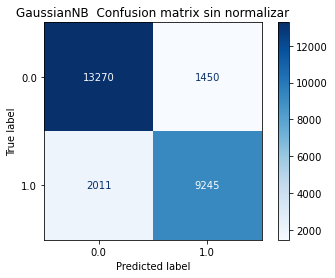

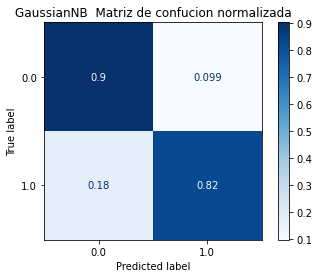

RandomForestClassifier(random_state=0) [0.96107946]


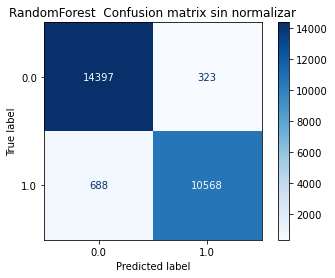

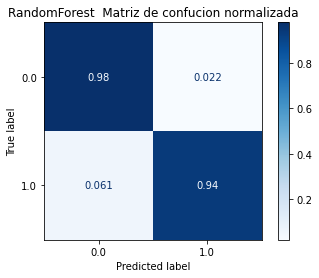

1
GaussianNB() [0.86194949]


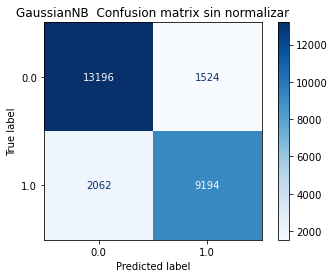

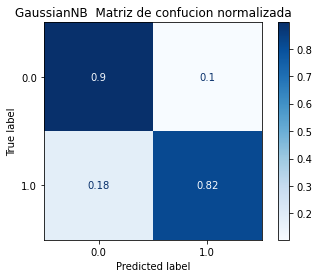

RandomForestClassifier(random_state=0) [0.96146443]


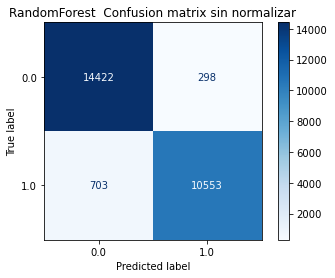

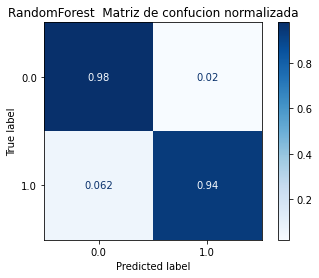

2
GaussianNB() [0.86329689]


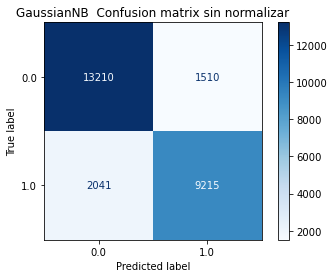

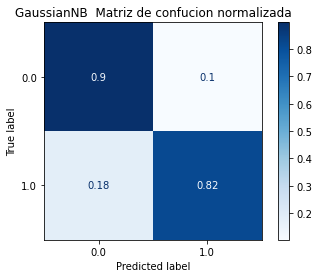

RandomForestClassifier(random_state=0) [0.96223437]


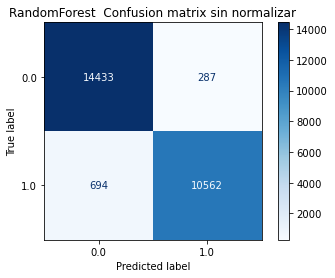

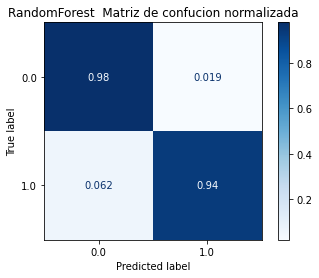

3
GaussianNB() [0.86106406]


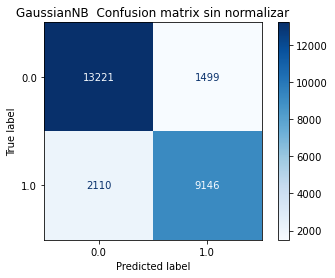

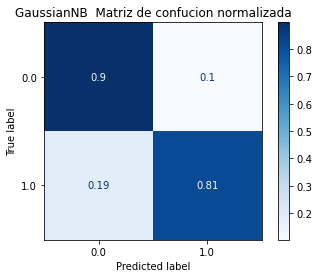

RandomForestClassifier(random_state=0) [0.96161842]


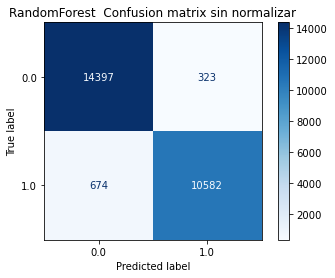

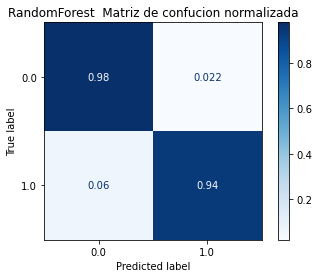

4
GaussianNB() [0.86495226]


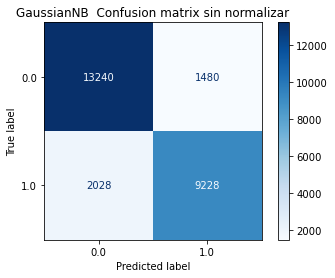

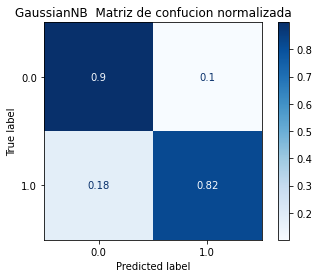

RandomForestClassifier(random_state=0) [0.9618879]


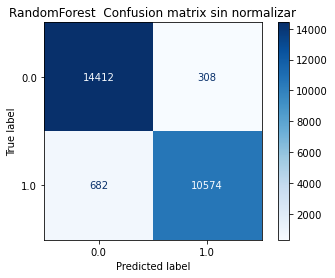

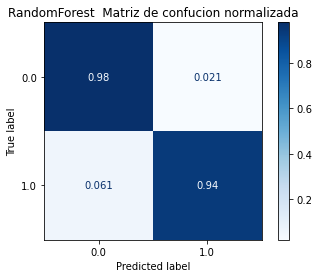

5
GaussianNB() [0.86437481]


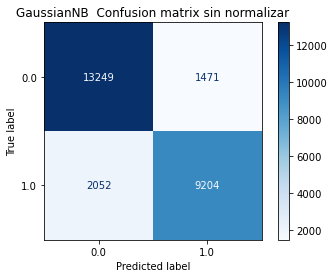

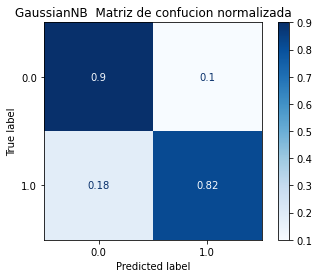

RandomForestClassifier(random_state=0) [0.96277333]


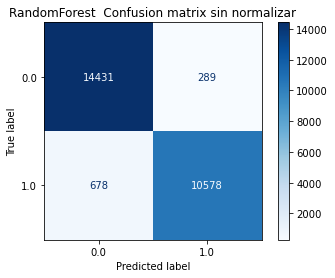

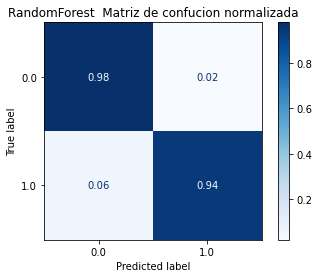

6
GaussianNB() [0.86637666]


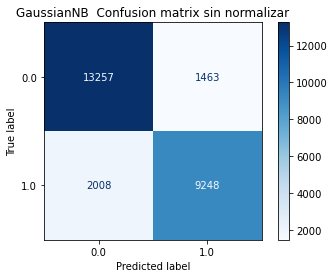

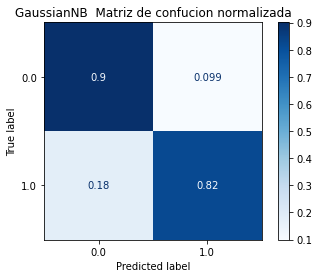

RandomForestClassifier(random_state=0) [0.96123345]


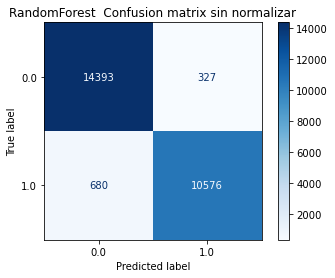

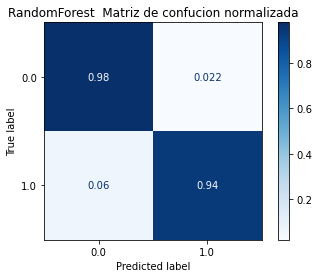

7
GaussianNB() [0.86429781]


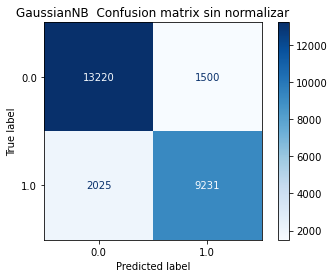

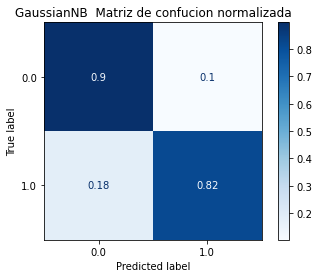

RandomForestClassifier(random_state=0) [0.96142593]


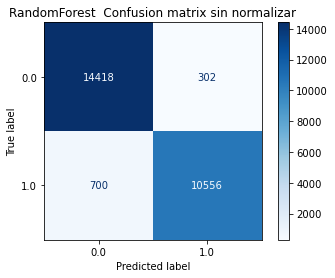

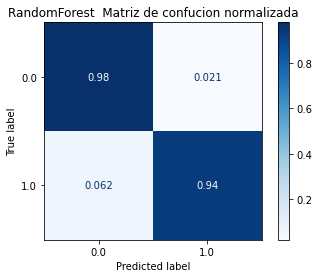

8
GaussianNB() [0.86291192]


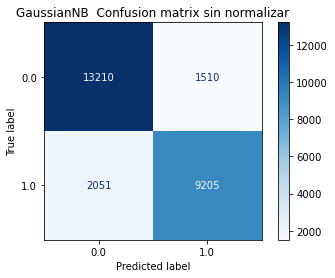

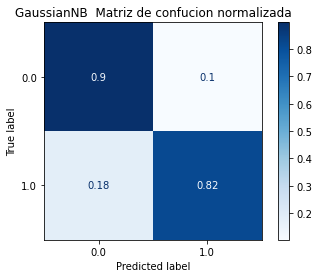

RandomForestClassifier(random_state=0) [0.96238836]


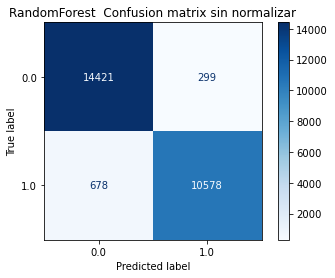

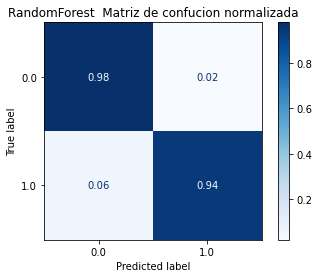

9
GaussianNB() [0.85933169]


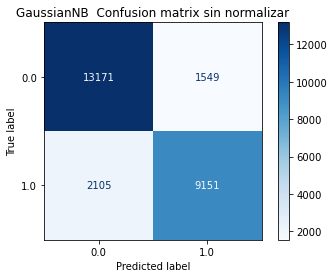

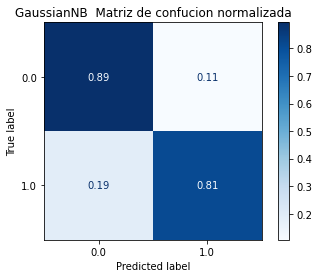

RandomForestClassifier(random_state=0) [0.96154142]


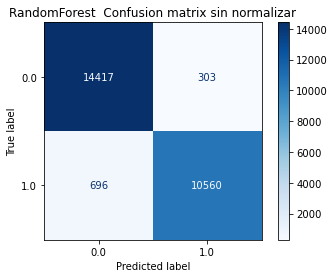

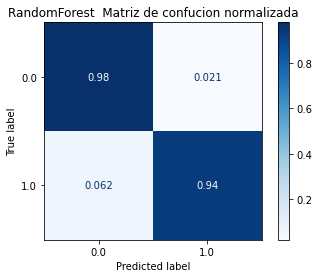

In [22]:
#Realizamos el entremaiento para nuestros datos ya preprocesados
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
stats = []
titles_options = [("Confusion matrix sin normalizar", None),
                  ("Matriz de confucion normalizada", 'true')]
for index, (train_index, test_index) in enumerate(iter_for_prediction):
    print(index)
    xTrain, yTrain = x[train_index], y[train_index]
    xTest, yTest = x[test_index], y[test_index]
    randomf = RandomForestClassifier(random_state=0)
    gnb = GaussianNB()
    sk_clasificador = {'GaussianNB':gnb,
                       'RandomForest':randomf}
    for clasifier in sk_clasificador:
        estimador = sk_clasificador[clasifier]
        estimador.fit(xTrain, yTrain)
        score = cross_val_score(estimador, x, y, scoring='accuracy', cv=[(train_index, test_index)])
        print(estimador, score)
        
        for title, normalize in titles_options:
            disp = plot_confusion_matrix(estimador, xTest, yTest,
                                         #display_labels=["Satifecho", "No satisfecho"],
                                         cmap=plt.cm.Blues,
                                         normalize=normalize)
            tipo = "GaussianNB" if str(clasifier) == "GaussianNB" else "RandomForest"
            disp.ax_.set_title(f'{tipo}  {title}')

        plt.show()
        st = [index,estimador, score]
        stats.append(st)

### Mostraremos los datos relevantes de los modelos

In [23]:
#Stadisticas

rf = []
gn = []

for i in stats:
    if str(i[1]) == "RandomForestClassifier(random_state=0)" :
        rf.append(i[2][0])
    if str(i[1]) == "GaussianNB()" :
        gn.append(i[2][0])
        


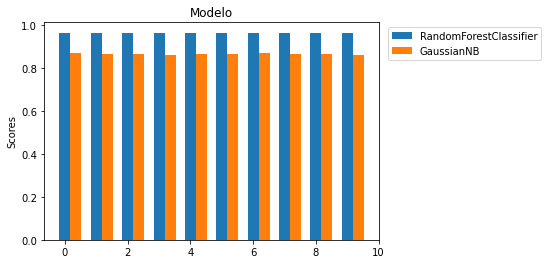

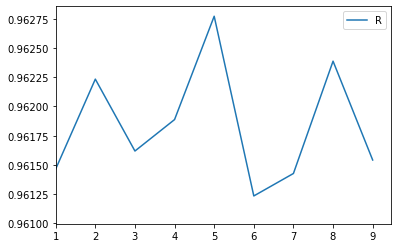

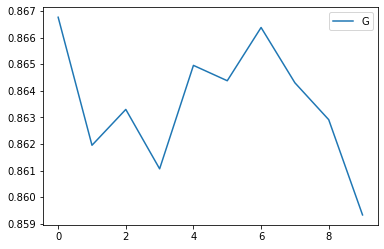

In [24]:
ind = np.arange(len(rf)) 
width = 0.35       
plt.bar(ind, rf, width, label='RandomForestClassifier')
plt.bar(ind + width, gn, width,
    label='GaussianNB')

plt.ylabel('Scores')
plt.title('Modelo')

plt.legend(loc='upper right', bbox_to_anchor=(1.5, 1))
plt.show()

plt.plot(rf)
plt.legend("RandomForestClassifier")
plt.xlim(1)

plt.show()
plt.plot(gn)
plt.legend("GaussianNB")
plt.show()

# Concluciones
## Se clasifico con los modelos GaussianNB y RandomForest
### Se consigio resultados exitosos en ambos casos 
> # GaussianNB se obtubo un presicion de al rededor de 86%
> # RandomForest se obtubo un presicion de al rededor de al rededor de 96%

### A partir de estos datos podemos concluir que el modelo que mejor se ajusta a nuestros daos es RandomForest obteniendo mejores resultados que GaussianNB por un factor de 10%, asi concluimos que con el modelo plantedo podemos predecir si un cliente que aborda un avion estara staisfecho con su viaje o no 
